In [3]:
pip install scikeras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# ==============================================
# Artificial Neural Networks - Alphabet Dataset
# ==============================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ✅ FIX: use scikeras instead of tensorflow wrappers
from scikeras.wrappers import KerasClassifier

# ------------------------------------------------
# 2. Load Dataset
# ------------------------------------------------
df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\Neural networks\\Neural networks\\Alphabets_data.csv")

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())

# ------------------------------------------------
# 3. Data Exploration & Preprocessing
# ------------------------------------------------
# Handle missing values if any
print("\nMissing values:\n", df.isnull().sum())

# Drop rows/columns with missing values (if required)
df = df.dropna()

# Separate features and target
X = df.drop('letter', axis=1)   # all numeric features
y = df['letter']                # alphabet label

# Encode target labels (A, B, C, ... → 0, 1, 2, ...)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Number of classes:", len(np.unique(y)))


Shape of dataset: (20000, 17)

First 5 rows:
   letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ------

=== Model Summary ===


C:\Users\Sindu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,778 (10.85 KB)

 Trainable params: 2,778 (10.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4595 - loss: 2.1190 - val_accuracy: 0.6762 - val_loss: 1.3429
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7076 - loss: 1.1262 - val_accuracy: 0.7538 - val_loss: 0.9569
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7657 - loss: 0.8729 - val_accuracy: 0.7950 - val_loss: 0.7997
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7966 - loss: 0.7439 - val_accuracy: 0.8053 - val_loss: 0.7102
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8141 - loss: 0.6597 - val_accuracy: 0.8222 - val_loss: 0.6452
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8313 - loss: 0.5975 - val_accuracy: 0.8372 - val_loss: 0.5952
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8428 - loss: 0.5487 - val_accuracy: 0.8444 - val_loss: 0.5585
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8536 - loss: 0.5077 - val_accuracy: 0.

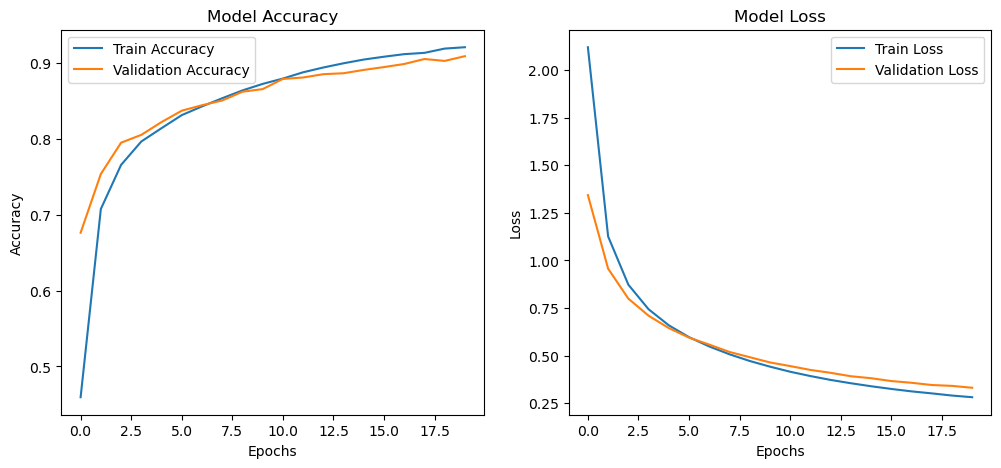

In [15]:
# ------------------------------------------------
# 4. Build ANN Model Function
# ------------------------------------------------
def create_model(optimizer='adam', activation='relu', neurons=64, hidden_layers=1, dropout_rate=0.0):
    model = Sequential()
    # Input Layer + First Hidden Layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # Additional Hidden Layers if specified
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    # Output Layer (softmax for multi-class classification)
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    
    # Compile Model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# ------------------------------------------------
# 5. Build and Train a Basic Model (with visible output)
# ------------------------------------------------
basic_model = create_model()

# Show model summary
print("=== Model Summary ===")
basic_model.summary()

# Train the model
history = basic_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

#  Plot Training Curves
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [17]:
# ------------------------------------------------
# 6. Hyperparameter Tuning with GridSearchCV (Reduced)
# ------------------------------------------------
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Wrap model
model = KerasClassifier(model=create_model, verbose=0)

# Smaller param grid
param_grid = {
    'batch_size': [32],          # keep 1 value
    'epochs': [10],              # small number of epochs
    'model__optimizer': ['adam'],  # only adam
    'model__activation': ['relu'], # only relu
    'model__neurons': [32, 64],    # try 2 options
    'model__hidden_layers': [1],   # only 1 hidden layer
    'model__dropout_rate': [0.0]   # no dropout for now
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1)

# Fit
grid_result = grid.fit(X_train, y_train)

print("\n✅ Best Hyperparameters:", grid_result.best_params_)
print("🔹 Best Accuracy: %.2f%%" % (grid_result.best_score_ * 100))


C:\Users\Sindu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



✅ Best Hyperparameters: {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__hidden_layers': 1, 'model__neurons': 64, 'model__optimizer': 'adam'}
🔹 Best Accuracy: 82.74%


In [21]:
# ------------------------------------------------
# 7. Evaluate Tuned Model
# ------------------------------------------------
# Predictions
y_pred_tuned = best_model.predict(X_test)

print("\n=== Tuned Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tuned, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tuned, average='weighted'))



=== Tuned Model Evaluation ===
Accuracy: 0.879
Precision: 0.8818289075597158
Recall: 0.879
F1-Score: 0.8789052752653131
